In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import sys
import os
import time as time
import xarray as xr
from matplotlib.tri import Triangulation
import pandas as pa
import tripyview as tpv
import numpy as np

/albedo/home/pscholz/tripyview


## > <u>Load mesh:</u> 

In [3]:
#___LOAD FESOM2 MESH___________________________________________________________________________________
meshpath='/albedo/work/user/pscholz/mesh_fesom2.0/core2_sorted/'
mesh=tpv.load_mesh_fesom2(meshpath, do_rot='None', focus=0, do_info=True, do_pickle=False, do_lsmask=False, do_augmpbnd=True)

 > load mesh from *.out files: /albedo/work/user/pscholz/mesh_fesom2.0/core2_sorted
 > comp e_area
 > comp n_area
___FESOM2 MESH INFO________________________
 > path            = /albedo/work/user/pscholz/mesh_fesom2.0/core2_sorted
 > id              = core2_sorted
 > do rot          = None
 > [al,be,ga]      = 50, 15, -90
 > do augmpbnd     = True
 > do cavity       = False
 > do lsmask       = False
 > do earea,eresol = True, False
 > do narea,nresol = True, False
___________________________________________
 > #node           = 126858
 > #elem           = 244659
 > #lvls           = 48
___________________________________________


## ><u> Select Basin specific polygon:</u>
<u>Mouse Input:</u> <br>

    [left  ] ... draw polygon point
    [right ] ... zoom out to original xlim, ylim

<u>Keyboard Input:</u> <br>

    [  d   ]   ... delete entire polygon line
    [  r   ]   ... delete last polygon point from line
    [  s   ]   ... save selected polygon to list 
    [  e   ]   ... finish polygon selection exit interactive mode [last step]
    
    [  +   ]   ... zoom in 
    [  -   ]   ... zoom out  
    
    [  up  ]   ... move up  
    [ down ]   ... move down  
    [ left ]   ... move left  
    [ right]   ... move right  


<IPython.core.display.Javascript object>


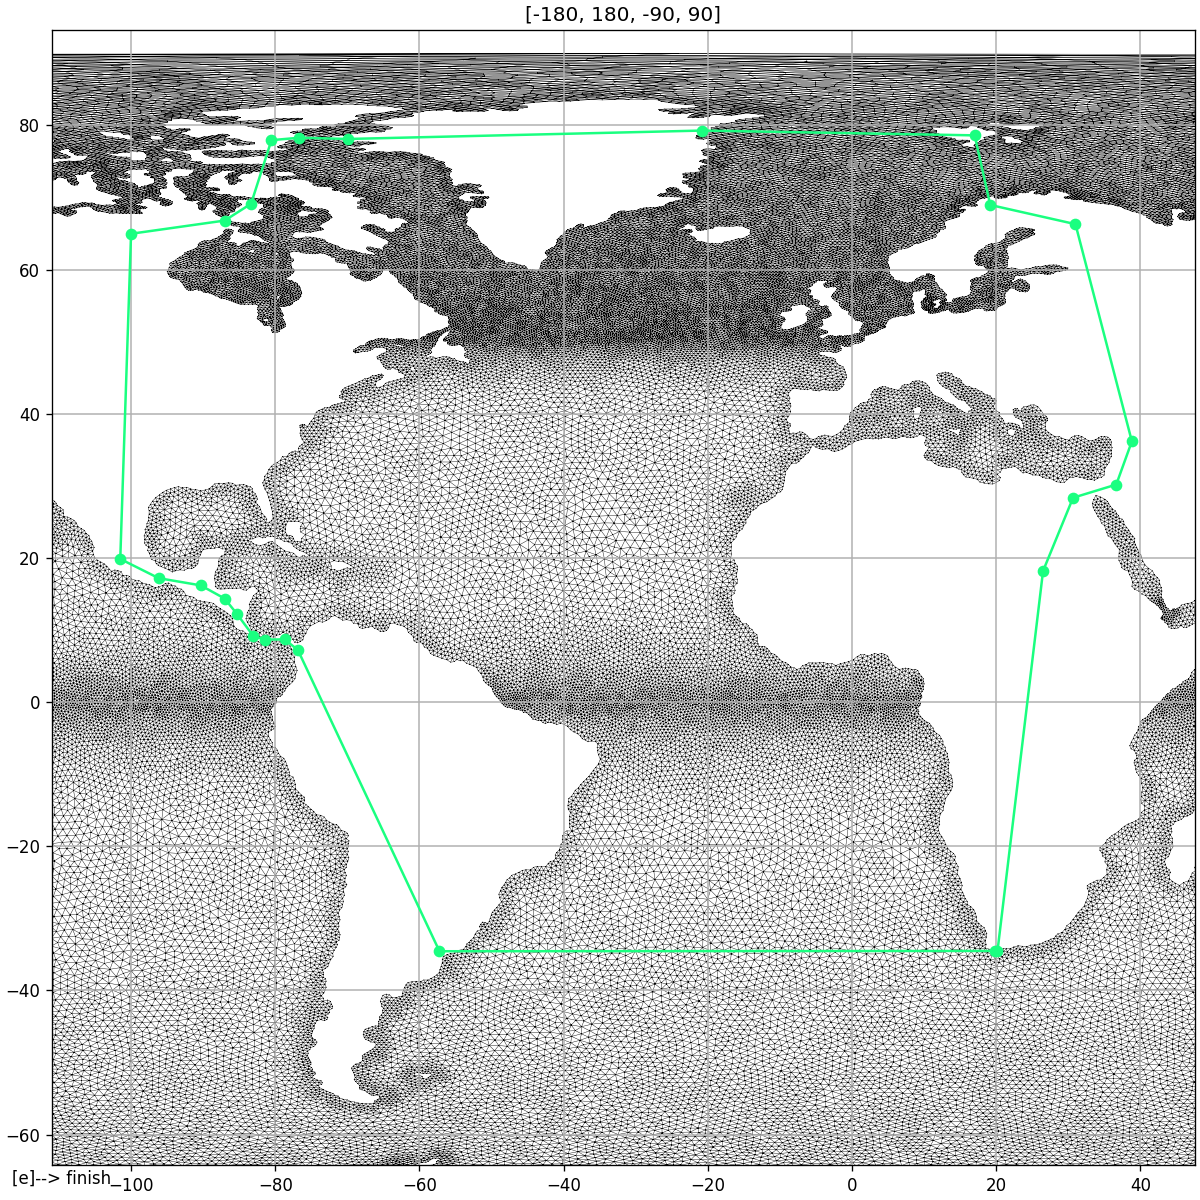

In [4]:
#_________________________________________________________________________________________________
# select = tpv.select_polygon_basin(mesh, box_list=[-110, 50, -90, 90])
select = tpv.select_polygon_basin(mesh)

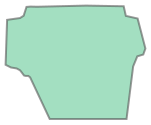

In [5]:
for poly in select.polygon:
    display(poly)

## ><u> Save Polygon Shapefile:</u>

In [6]:
import geopandas as gpd
# save directory name 
sdname='~/tripyview/tripyview/shapefiles/moc_basins/'

# save filename 
sfname='MY_MOC.shp'

# name of polygon
str_moc   ='amoc' 
str_region='Atlantic' 

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({"geometry": select.polygon, 
                        "Name": [str_moc]*len(select.polygon),
                        "Region": [str_region]*len(select.polygon)
                       }, crs="EPSG:4326")

# Save to shapefile
gdf.to_file(os.path.join(sdname,sfname))